In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
# Import dataset
data = pd.read_csv('Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# Splitting X and y

X = data[['Level']].values # Features (Level)
y = data[['Salary']].values # Target variable (Salary)

In [5]:
# Scaling the X and y

sc_X = StandardScaler()
X= sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(np.reshape(y,(10,1)))

In [6]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [8]:
# Training the model

svr = SVR(kernel='rbf')  # RBF kernel is commonly used
svr.fit(X,y)

C:\Users\argad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [9]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
# predicting for unknown value

new_level = 5.5
scaled_new_level = sc_X.transform([[new_level]])
predicted_salary_scaled = svr.predict(scaled_new_level)
predicted_salary = sc_y.inverse_transform(predicted_salary_scaled.reshape(-1, 1))

print(f"Predicted salary for Level {new_level} : {predicted_salary[0][0]:,.2f}")

Predicted salary for Level 5.5 : 131,106.77


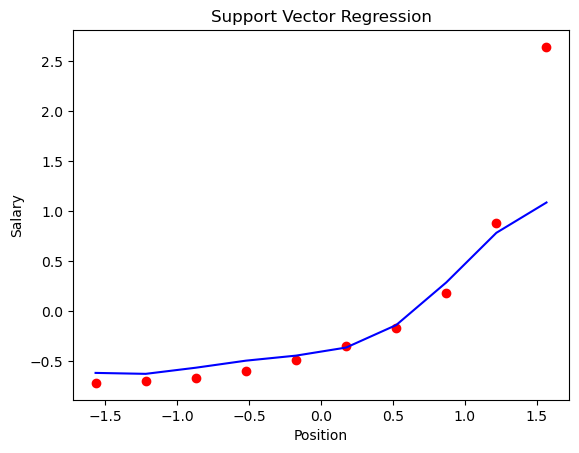

In [11]:
# Visualizing the SVR result 

plt.scatter(X,y, color='red')
plt.plot(X,svr.predict(X),color='blue')
plt.title("Support Vector Regression")
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()